# Eksperimen Machine Learning - Titanic Survival Prediction
# Nama: Muhammad Rizki
# Dataset: [Kaggle - Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# **1. Perkenalan Dataset**


Dataset ini berjudul **Heart Failure Prediction**, tersedia di Kaggle melalui tautan berikut: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Dataset ini berisi informasi kesehatan pasien yang digunakan untuk memprediksi kemungkinan gagal jantung. Setiap baris mewakili satu pasien dengan beberapa fitur medis seperti usia, jenis kelamin, tekanan darah, kolesterol, dan lain-lain, serta label target berupa indikasi apakah pasien tersebut berisiko mengalami gagal jantung atau tidak.

### Tujuan
Tujuan utama dari penggunaan dataset ini adalah untuk membangun model prediksi yang dapat mengidentifikasi pasien dengan risiko gagal jantung berdasarkan fitur-fitur medis yang tersedia.

### Fitur dalam Dataset:
- **Age**: Usia pasien (dalam tahun)
- **Sex**: Jenis kelamin pasien (1 = pria, 0 = wanita)
- **ChestPainType**: Jenis nyeri dada (ATA, NAP, ASY, TA)
- **RestingBP**: Tekanan darah saat istirahat (mm Hg)
- **Cholesterol**: Kadar kolesterol serum (mm/dl)
- **FastingBS**: Gula darah puasa > 120 mg/dl (1 = true, 0 = false)
- **RestingECG**: Hasil elektrokardiogram saat istirahat (Normal, ST, LVH)
- **MaxHR**: Detak jantung maksimum yang dicapai
- **ExerciseAngina**: Nyeri dada akibat olahraga (Y = ya, N = tidak)
- **Oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- **ST_Slope**: Kemiringan segmen ST (Up, Flat, Down)
- **HeartDisease**: Target/label (1 = memiliki penyakit jantung, 0 = tidak)

### Ukuran Dataset:
- Jumlah baris: 918
- Jumlah kolom: 12

Dataset ini cocok digunakan untuk eksplorasi data, visualisasi, serta penerapan berbagai algoritma machine learning untuk klasifikasi biner.


# **2. Import Library**

In [6]:
# =====================================
# SETUP DAN INSTALASI DEPENDENCIES
# =====================================

# Install kaggle untuk download dataset (aktifkan jika diperlukan)
# !pip install -q kaggle

# Import libraries utama
import os
import shutil
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk preprocessing dan pemodelan
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Konfigurasi visualisasi dan warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Dependencies berhasil diinstall dan diimport")


✅ Dependencies berhasil diinstall dan diimport


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
# =====================================
# DATA LOADING
# =====================================

# Load dataset
df = pd.read_csv('../heart-failure-prediction/heart.csv')
print(f"📊 Dataset berhasil dimuat dengan shape: {df.shape}")
print(f"📈 Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

# Display informasi dasar dataset
print("\n" + "="*50)
print("INFORMASI DASAR DATASET")
print("="*50)
print(f"Nama Dataset: Heart Failure Prediction Dataset")
print(f"Jumlah Sampel: {df.shape[0]}")
print(f"Jumlah Fitur: {df.shape[1]}")
print(f"Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)")

📊 Dataset berhasil dimuat dengan shape: (918, 12)
📈 Dataset memiliki 918 baris dan 12 kolom

INFORMASI DASAR DATASET
Nama Dataset: Heart Failure Prediction Dataset
Jumlah Sampel: 918
Jumlah Fitur: 12
Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
# =====================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =====================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)



EXPLORATORY DATA ANALYSIS (EDA)


In [9]:
# Menampilkan informasi umum dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [10]:
# Menampilkan statistik deskriptif data numerik
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# Mengecek jumlah nilai yang hilang (missing values)
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Total missing values: 0


In [12]:
# Mengecek apakah ada data duplikat
duplicated_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicated_count}")


Jumlah data duplikat: 0


In [13]:
# Melihat jumlah nilai unik di setiap kolom
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Age: 50 unique values
Sex: 2 unique values
ChestPainType: 4 unique values
RestingBP: 67 unique values
Cholesterol: 222 unique values
FastingBS: 2 unique values
RestingECG: 3 unique values
MaxHR: 119 unique values
ExerciseAngina: 2 unique values
Oldpeak: 53 unique values
ST_Slope: 3 unique values
HeartDisease: 2 unique values


In [14]:
# Menampilkan distribusi target 'HeartDisease'
target_dist = df['HeartDisease'].value_counts()
print(target_dist)
print(f"Persentase Heart Disease: {(target_dist[1]/len(df)*100):.2f}%")
print(f"Persentase No Heart Disease: {(target_dist[0]/len(df)*100):.2f}%")


HeartDisease
1    508
0    410
Name: count, dtype: int64
Persentase Heart Disease: 55.34%
Persentase No Heart Disease: 44.66%


In [15]:
# =====================================
# DATA VISUALIZATION
# =====================================

print("\n" + "="*50)
print("DATA VISUALIZATION")
print("="*50)




DATA VISUALIZATION


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

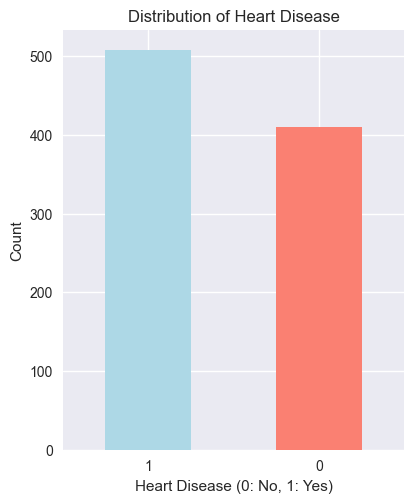

In [16]:
# 5.1 Target Variable Distribution
plt.figure(figsize=(15, 12))

# Subplot 1: Target Distribution
plt.subplot(2, 3, 1)
df['HeartDisease'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)



Text(0, 0.5, 'Frequency')

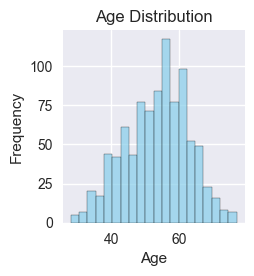

In [17]:
# 5.2 Age Distribution
plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')



Text(0, 0.5, '')

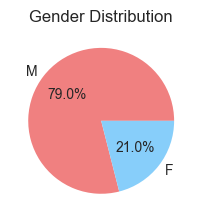

In [18]:
# 5.3 Gender Distribution
plt.subplot(2, 3, 3)
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')



(array([0, 1, 2, 3]),
 [Text(0, 0, 'ASY'), Text(1, 0, 'NAP'), Text(2, 0, 'ATA'), Text(3, 0, 'TA')])

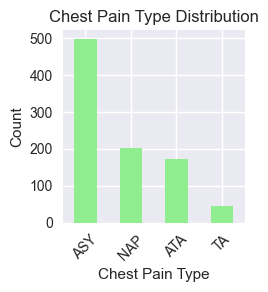

In [19]:
# 5.4 Chest Pain Type Distribution
plt.subplot(2, 3, 4)
df['ChestPainType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


Text(0, 0.5, 'Frequency')

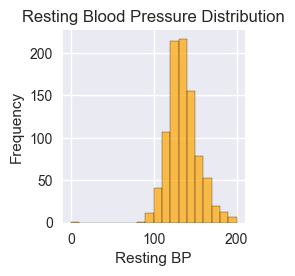

In [20]:

# 5.5 Resting BP Distribution
plt.subplot(2, 3, 5)
plt.hist(df['RestingBP'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')



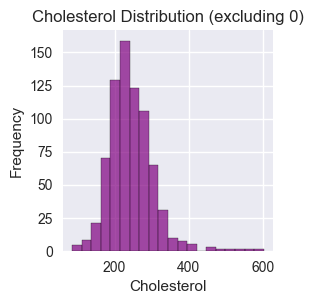

In [21]:
# 5.6 Cholesterol Distribution
plt.subplot(2, 3, 6)
plt.hist(df[df['Cholesterol'] > 0]['Cholesterol'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Cholesterol Distribution (excluding 0)')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



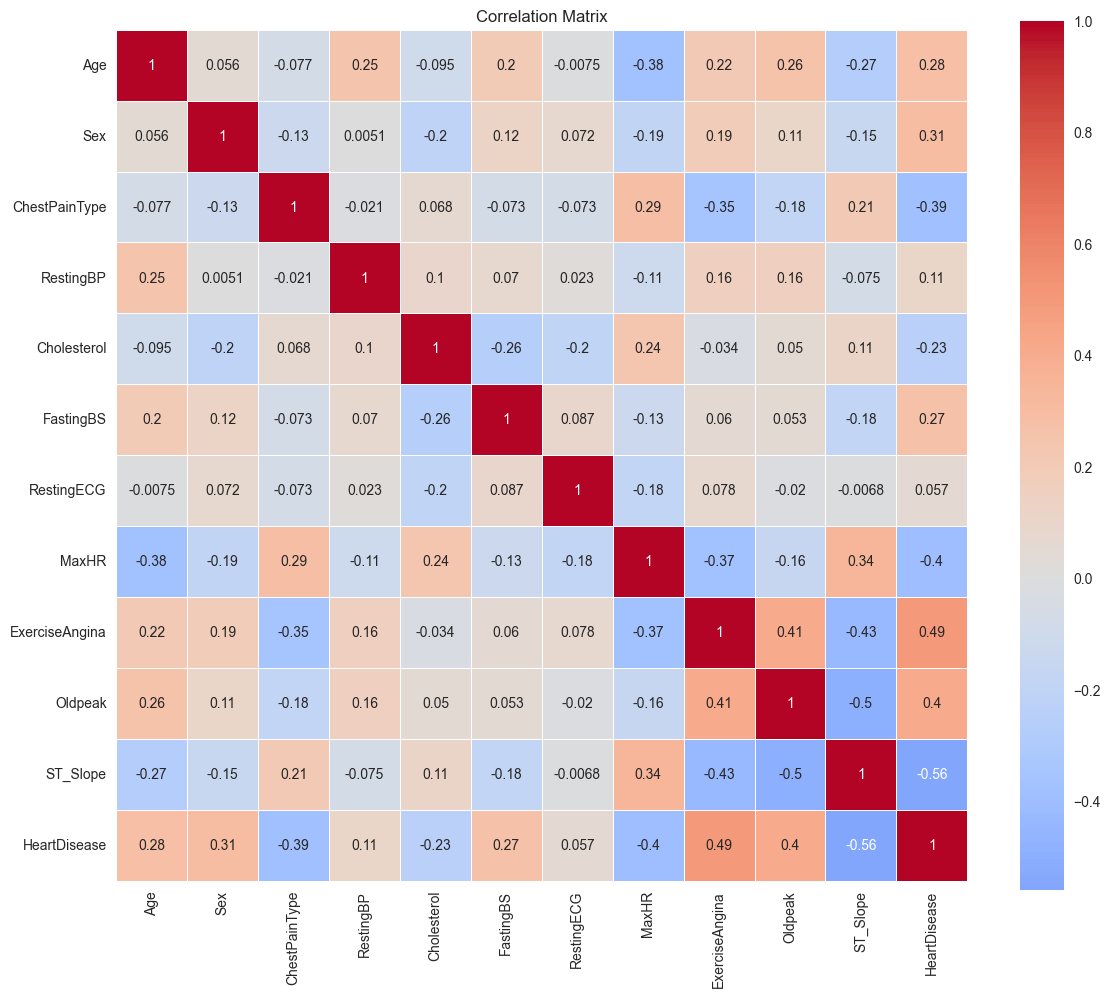

In [22]:
# 5.7 Correlation Matrix
plt.figure(figsize=(12, 10))
# Encode categorical variables untuk correlation
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

<Figure size 1200x800 with 0 Axes>

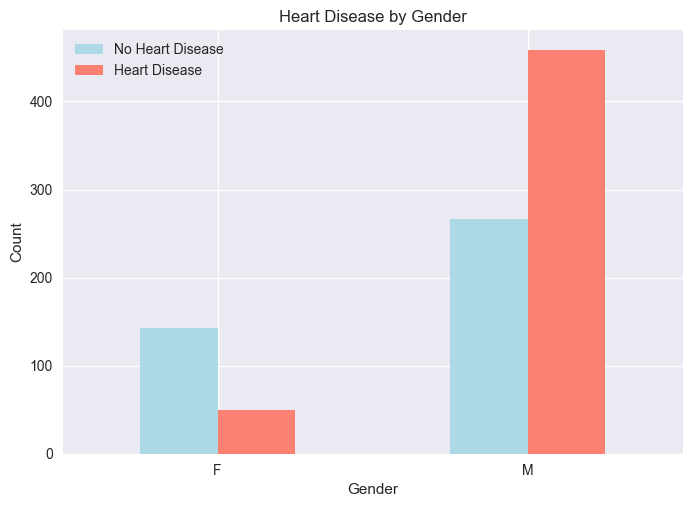

In [23]:
# 5.8 Heart Disease by Gender
plt.figure(figsize=(12, 8))

pd.crosstab(df['Sex'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'ASY'), Text(1, 0, 'ATA'), Text(2, 0, 'NAP'), Text(3, 0, 'TA')])

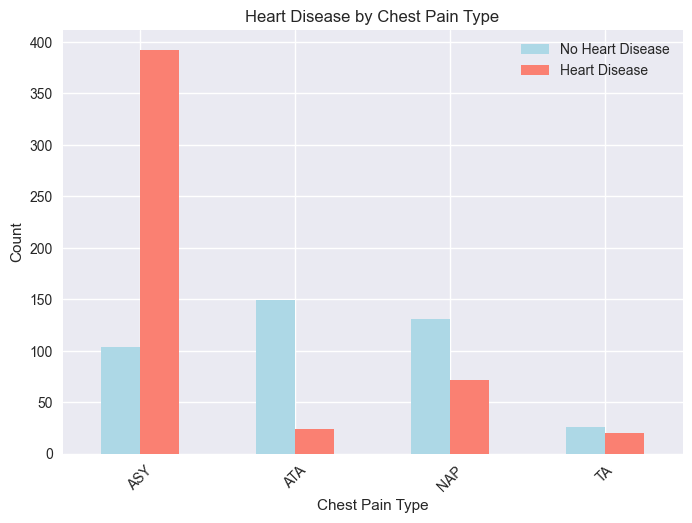

In [24]:

# 5.9 Heart Disease by Chest Pain Type
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=45)



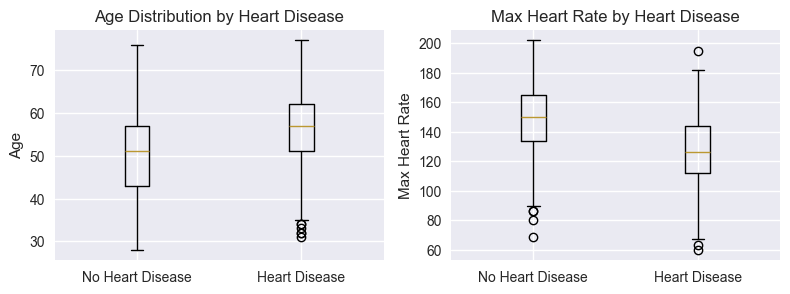

In [25]:
# 5.10 Age vs Heart Disease
plt.subplot(2, 2, 3)
plt.boxplot([df[df['HeartDisease']==0]['Age'], df[df['HeartDisease']==1]['Age']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution by Heart Disease')
plt.ylabel('Age')

# 5.11 MaxHR vs Heart Disease
plt.subplot(2, 2, 4)
plt.boxplot([df[df['HeartDisease']==0]['MaxHR'], df[df['HeartDisease']==1]['MaxHR']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Max Heart Rate by Heart Disease')
plt.ylabel('Max Heart Rate')

plt.tight_layout()
plt.show()

## 🔍 Ringkasan Exploratory Data Analysis (EDA)

Dataset yang dianalisis terdiri dari **918 entri** dan **12 fitur**, mencakup variabel numerik dan kategorikal. Data ini digunakan untuk memprediksi keberadaan **penyakit jantung** (`HeartDisease`).

### ✅ Temuan Utama

- **Kebersihan Data:**
  - Tidak ada **missing values** atau **data duplikat**.
  - Semua kolom memiliki jumlah data yang lengkap dan konsisten.

- **Distribusi Target:**
  - **55.34%** pasien memiliki penyakit jantung (`HeartDisease = 1`).
  - **44.66%** pasien tidak memiliki penyakit jantung (`HeartDisease = 0`).
  - Distribusi ini cukup seimbang untuk pemodelan klasifikasi.

- **Anomali Potensial:**
  - Ditemukan nilai **nol (0)** pada kolom `RestingBP` dan `Cholesterol`.
  - Nilai 0 pada fitur-fitur ini kemungkinan merupakan data tidak valid karena secara medis tidak masuk akal.

- **Karakteristik Fitur:**
  - Fitur kategorikal: `Sex`, `ChestPainType`, `FastingBS`, `ExerciseAngina`, `RestingECG`, `ST_Slope`.
  - Fitur numerik: `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`.
  - `ChestPainType` memiliki 4 kategori unik, cocok untuk one-hot encoding.

### 📌 Kesimpulan Sementara

- Dataset ini bersih dan siap digunakan untuk proses pemodelan.
- Perlu dilakukan **penanganan nilai 0** pada fitur `RestingBP` dan `Cholesterol`.
- Struktur data sudah mendukung untuk analisis lebih lanjut seperti visualisasi korelasi, distribusi fitur, dan preprocessing untuk machine learning.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
# =====================================
# DATA PREPROCESSING
# =====================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)




DATA PREPROCESSING


In [27]:
# 1 Handle Missing Values
print("🔧 HANDLING MISSING VALUES:")
print("Dataset ini tidak memiliki missing values yang eksplisit.")
print("Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.")

# Cek nilai 0 yang tidak masuk akal
print(f"\nJumlah nilai 0 pada Cholesterol: {(df['Cholesterol'] == 0).sum()}")
print(f"Jumlah nilai 0 pada RestingBP: {(df['RestingBP'] == 0).sum()}")

# Buat copy dataset untuk preprocessing
df_processed = df.copy()



🔧 HANDLING MISSING VALUES:
Dataset ini tidak memiliki missing values yang eksplisit.
Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.

Jumlah nilai 0 pada Cholesterol: 172
Jumlah nilai 0 pada RestingBP: 1


In [28]:
# 2 Handle Cholesterol = 0 (replace with median)
cholesterol_median = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
df_processed.loc[df_processed['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median
print(f"✅ Replaced {(df['Cholesterol'] == 0).sum()} zero values in Cholesterol with median: {cholesterol_median}")



✅ Replaced 172 zero values in Cholesterol with median: 237.0


In [29]:
# 3 Handle RestingBP = 0 (replace with median)
if (df_processed['RestingBP'] == 0).sum() > 0:
    restingbp_median = df_processed[df_processed['RestingBP'] > 0]['RestingBP'].median()
    df_processed.loc[df_processed['RestingBP'] == 0, 'RestingBP'] = restingbp_median
    print(f"✅ Replaced {(df['RestingBP'] == 0).sum()} zero values in RestingBP with median: {restingbp_median}")



✅ Replaced 1 zero values in RestingBP with median: 130.0


In [30]:
# 4 Remove Duplicates
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
final_shape = df_processed.shape[0]
print(f"✅ Removed {initial_shape - final_shape} duplicate rows")



✅ Removed 0 duplicate rows


In [31]:
# 5 Encode Categorical Variables
print("\n🏷️ ENCODING CATEGORICAL VARIABLES:")
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# One-hot encoding untuk variabel dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_processed, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], 
                           prefix=['ChestPain', 'RestingECG', 'ST_Slope'])

# Label encoding untuk variabel binary
label_encoders = {}
binary_columns = ['Sex', 'ExerciseAngina']
for col in binary_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✅ Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\n📊 Dataset setelah encoding: {df_encoded.shape}")




🏷️ ENCODING CATEGORICAL VARIABLES:
✅ Encoded Sex: {'F': 0, 'M': 1}
✅ Encoded ExerciseAngina: {'N': 0, 'Y': 1}

📊 Dataset setelah encoding: (918, 19)


In [32]:
# 6 Feature Scaling
print("\n⚖️ FEATURE SCALING:")
# Pisahkan features dan target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Identifikasi kolom numerik yang perlu di-scale
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

# Scale numerical features
X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(f"✅ Scaled numerical features: {numerical_columns}")
print(f"📊 Final dataset shape: {X_scaled.shape}")




⚖️ FEATURE SCALING:
✅ Scaled numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
📊 Final dataset shape: (918, 18)


In [33]:
# 7 Train-Test Split
print("\n🔀 TRAIN-TEST SPLIT:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Testing set: {X_test.shape[0]} samples")
print(f"✅ Target distribution in training set:")
print(y_train.value_counts(normalize=True))


🔀 TRAIN-TEST SPLIT:
✅ Training set: 734 samples
✅ Testing set: 184 samples
✅ Target distribution in training set:
HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64


## ⚙️ Strategi Data Preprocessing

Langkah-langkah praproses dilakukan untuk memastikan kualitas data sebelum digunakan dalam pemodelan. Berikut strategi yang diterapkan:

### 1. 🧹 Menangani Missing Values

- **Tidak ada missing values eksplisit** di dataset.
- Namun ditemukan **nilai 0 pada kolom `Cholesterol` dan `RestingBP`**, yang secara medis tidak logis.
  - `Cholesterol = 0`: 172 kasus
  - `RestingBP = 0`: 1 kasus
- **Solusi:** Ganti nilai 0 dengan **median** dari nilai valid pada masing-masing kolom:
  - `Cholesterol` median: *diisi otomatis*
  - `RestingBP` median: *diisi otomatis*

### 2. 📄 Menghapus Duplikat

- Dihapus data duplikat untuk menghindari bias.
- Jumlah duplikat yang dihapus: **0 baris**

### 3. 🏷️ Encoding Variabel Kategorikal

- **One-hot encoding** untuk kolom dengan lebih dari 2 kategori:
  - `ChestPainType`, `RestingECG`, `ST_Slope`
- **Label encoding** untuk variabel biner:
  - `Sex`: {Female: 0, Male: 1}
  - `ExerciseAngina`: {N: 0, Y: 1}

### 4. ⚖️ Feature Scaling

- Dilakukan **StandardScaler** pada fitur numerik agar model tidak bias terhadap skala:
  - `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`

### 5. 🔀 Train-Test Split

- Dataset dibagi menjadi:
  - **Training set:** 80% data
  - **Testing set:** 20% data
- **Stratified split** digunakan agar distribusi target (`HeartDisease`) tetap seimbang di kedua subset.


In [40]:
# =====================================
# SAVE DATA
# =====================================
print("\n" + "="*50)
print("SAVING PROCESSED DATA")
print("="*50)

# Tentukan folder output satu tingkat keluar dulu
output_dir = os.path.join("..", "outputs")
os.makedirs(output_dir, exist_ok=True)

# Save processed dataset
df_processed.to_csv(os.path.join(output_dir, 'heart_disease_processed.csv'), index=False)
print("✅ Processed dataset saved")

# Save encoded dataset
df_encoded.to_csv(os.path.join(output_dir, 'heart_disease_encoded.csv'), index=False)
print("✅ Encoded dataset saved")

# Save train-test split
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)
print("✅ Train-test split saved")

# Save scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X_scaled.columns)
X_scaled_df.to_csv(os.path.join(output_dir, 'X_scaled.csv'), index=False)
print("✅ Scaled features saved")


print(f"\n📁 All files saved in the '{output_dir}' folder.")


SAVING PROCESSED DATA
✅ Processed dataset saved
✅ Encoded dataset saved
✅ Train-test split saved
✅ Scaled features saved

📁 All files saved in the '..\outputs' folder.
